<a href="https://colab.research.google.com/github/Fanusaez/Organizacion-de-Datos/blob/main/Regresio_logistica/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sobrevivientes del titanic

In [ ]:
## Librerias a utilizar

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score,cross_validate

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ROCAUC

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Utilizando nuevamente el conjunto de datos de sobrevivientes del titanic, calcular la regresión logística entre las variables “Age” y “Survived”.

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

ds_titanic = pd.read_csv('/gdrive/My Drive/Datasets/ds_titanic.csv')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
ds_titanic.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

##Modelo 0
Realizamos un modelo de regresión logística para predecir la **supervivencia** en función de **Age**.

In [ ]:
ds_as = ds_titanic.copy()
ds_as = ds_as[["Age", "Survived"]]
ds_as.dropna(inplace = True)

In [ ]:
ds_trabajo_x = ds_as["Age"]
ds_trabajo_y = ds_as["Survived"]

x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size=0.2, random_state=2)

In [ ]:
x_train_modelo0 = x_train.values.reshape(-1,1).copy()
x_test_modelo0 = x_test.values.reshape(-1,1).copy()
y_train_modelo0 =  y_train.copy()
y_test_modelo0 =  y_test.copy()

### Entrenamos el modelo

In [ ]:
modelo0 = LogisticRegression()
modelo0.fit(x_train_modelo0, y_train_modelo0)

LogisticRegression()

Evaluamos el modelo sobre los datos de test

In [ ]:
y_pred_modelo0 = modelo0.predict(x_test_modelo0)
y_pred_proba_modelo0 = modelo0.predict_proba(x_test_modelo0)[:, 1]

### Miramos una tabla de contingencia

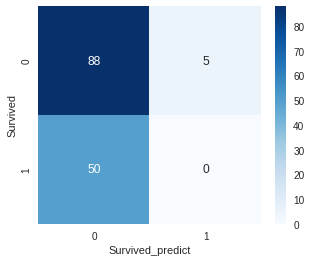

In [ ]:
ds_cm=pd.DataFrame(list(zip(y_test_modelo0, y_pred_proba_modelo0)),columns=["Survived","Prob"])
ds_cm["Survived_predict"]=0
ds_cm.loc[ds_cm.loc[:,"Prob"]>=0.50,"Survived_predict"]=1
tabla=pd.crosstab(ds_cm['Survived'], ds_cm['Survived_predict'])
plt.figure(figsize=(5, 4))
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()


##Modelo 1

Realizamos un modelo de regresión logística para predecir la **supervivencia** en función de **Pclass, Sex y Age**.

In [ ]:
ds_trabajo = ds_titanic.copy()
ds_trabajo.drop(['PassengerId','Name',"Ticket", "Fare", "Cabin", "SibSp", "Parch", "Embarked"], axis='columns', inplace=True)

Transformamos la variables **Pclass, Sex, Embarked** en *dummies*

In [ ]:
ds_trabajo = pd.get_dummies(ds_trabajo, columns=["Pclass","Sex"])
ds_trabajo.dropna(inplace = True)
ds_trabajo.columns.to_list()

['Survived',
 'Age',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male']

In [ ]:
columnas_modelo1 = ['Pclass_1','Pclass_2','Sex_female','Age']

columnas_modelo.remove('Survived')

ds_trabajo_x = ds_trabajo[columnas_modelo].copy()
ds_trabajo_y = ds_trabajo['Survived'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size=0.2, random_state=2)